In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import galsim
import pandas as pd
from speckle_functions import *

basedir = '/Users/clairealice/Documents/Research/Burchat/temporal_PSF/speckleImagers/'
p_scale = 0.01
gains = {'025':{'a':14.9,'b':12.8},'234':{'a':11.21,'b':11.21},
        '258':{'a':11.21,'b':11.21},'484':{'a':14.9 ,'b':12.8},
        '663':{'a':2.56,'b':11.21},'693':{'a':12.8,'b':12.8},
        '809':{'a':11.21,'b':12.8},'1039':{'a':2.03,'b':2.56},
#         '1237':{'a':32.96,'b':265.83},
        '1262':{'a':11.21,'b':11.21}}
backgrounds = {'025':{'a':30.85,'b':53.57},'234':{'a':42.74,'b':139.74},
               '258':{'a':69.39,'b':144.92},'484':{'a':33.65 ,'b':61.42},
               '663':{'a':32.13,'b':88.25},'693':{'a':73.12,'b':81.39},
               '809':{'a':39.08,'b':59.07},'1039':{'a':26.04,'b':99.80},
#                '1237':{'a':32.96,'b':265.83},
               '1262':{'a':84.10,'b':140.63}}

/Users/clairealice/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Cumulative fit

In [ ]:
filenumber = '025'

In [ ]:
fit_a = load_add_plot_fit('img_a_{}.fits'.format(filenumber),backgrounds[filenumber]['a'], gains[filenumber]['a'],
                          fit_points=15,log_fit=False,plot=False,save=True)

In [ ]:
fit_b = load_add_plot_fit('img_b_{}.fits'.format(filenumber),backgrounds[filenumber]['b'], gains[filenumber]['b'],
                          fit_points=15,log_fit=False,flip=True,plot=False,save=True)

In [ ]:
err_a = np.sqrt( ((fit_a['g1']*fit_a['s_g1'])**2 + (fit_a['g2']*fit_a['s_g2'])**2)/(fit_a['g1']**2+fit_a['g2']**2))
err_b = np.sqrt( ((fit_b['g1']*fit_b['s_g1'])**2 + (fit_b['g2']*fit_b['s_g2'])**2)/(fit_b['g1']**2+fit_b['g2']**2))

end_fit=1000
t_tot = .112*end_fit
pts = np.logspace(-1.22,2.05,15)
# pts = .112*np.round(np.logspace(0,3,15))
# pts = np.linspace(0,t_tot,len(fit_a['hlr']))
    
if len(pts)>100:
	ms = 2
else:
	ms = 5

(l_a,l_b)=(692,880)

plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

plt.errorbar(pts, (fit_a['g1']**2+fit_a['g2']**2)**.5,yerr=err_a,fmt='bo',ms=ms,label='{}nm'.format(l_a))
plt.errorbar(pts, (fit_b['g1']**2+fit_b['g2']**2)**.5,yerr=err_b,fmt='ro',ms=ms,label='{}nm'.format(l_b))
ax.set_yscale('log')
ax.set_xscale('log')
## don't know what the intercept should be
# plt.loglog(pts,.02*pts**(-0.5),'k--')
plt.legend(title='cumulative PSF',fontsize=12,loc=3)
ax.set_ylabel("ellipticity magnitude",fontsize=14)
ax.set_xlabel('elapsed time [sec]')
ax.set_xlim((0.06,.112*end_fit))
ax = ax.twiny()
ax.set_xscale('log')
ax.set_xlabel('integrated exposure time [sec]')
ax.set_xlim((0.06,.06*end_fit))

# plt.savefig(basedir+'../ellipticity_fits/ellipticity_mag_dssi_{}.png'.format(filenumber))
plt.show()
        

### Example progression

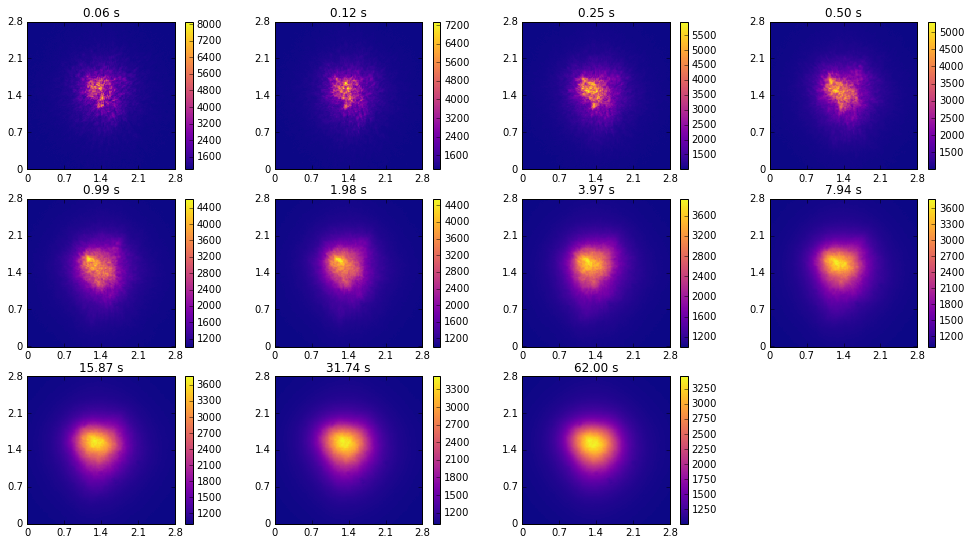

In [9]:
filename = 'img_a_1039_cumulative.fits'
hdulist = fits.open(basedir + filename)
dssi_a_1039 = hdulist[0].data

# added_dssi_a_025 = make_cumulative_psf(dssi_a_025, savename='img_a_025')
plot_progression(dssi_a_1039,savename='img_a_1039')

In [11]:
idx = [2**n-1 for n in range(10)]+[999]
to_model = np.copy(dssi_a_1039)
for i in idx:
    model_p = fit_single_exposure(to_model[i],p_scale=0.01,std_back=9.,N_exp=i+1)
    model = plot_k_model(model_p.params,(256,256))
    to_model[i] = model

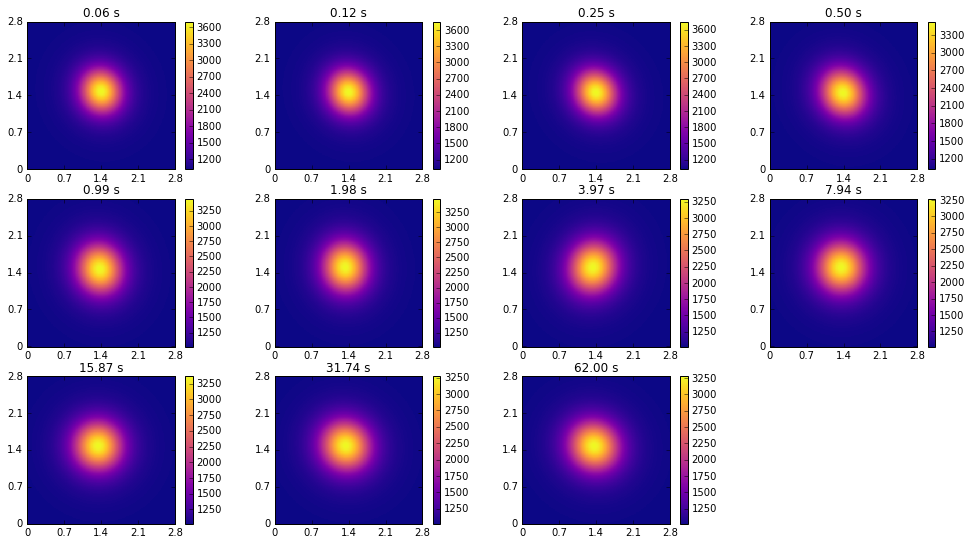

In [12]:
plot_progression(to_model,savename='img_a_1039_model')

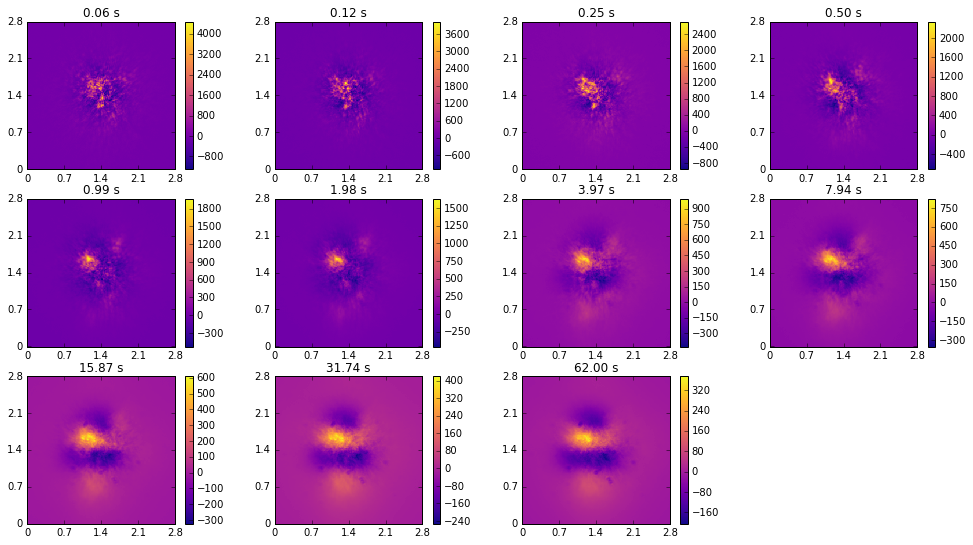

In [14]:
plot_progression(dssi_a_1039-to_model,savename='img_a_1039_residuals')

## Bin and fit

### DSSI image

In [ ]:
filenumber = '025'

In [ ]:
binned_dssi_a_050 = load_add_plot_fit('img_a_{}.fits'.format(filenumber),backgrounds[filenumber]['a'],\
                                      binned=True,fit_points=40,end_fit=1000, plot=False, save=True)

In [ ]:
binned_dssi_b_050 = load_add_plot_fit('img_b_{}.fits'.format(filenumber),backgrounds[filenumber]['b'], \
                                      binned=True,fit_points=40,end_fit=1000,flip=True, plot=False, save=True)

In [ ]:
plot_temporal_fits(binned_dssi_a_050, binned_dssi_b_050, wavelengths=(692,880), \
                   savename= basedir + '../figures_fit_params/img_{}_40binned_fit_params.png'.format(filenumber))

## plot chi squared

In [ ]:
fit_a_linn = pd.read_pickle(basedir+'../fit_pickles/pre_gain/img_a_025_cumulative_1.p') 
fit_a_logn = fit_a

plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

plt.plot(pts, fit_a_linn['red_chi_sqr'].values,'bo',ms=ms,label='linear n')
plt.plot(pts, fit_a_logn['red_chi_sqr'].values,'ro',ms=ms,label='log n')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(fontsize=12,loc=3)
ax.set_ylabel("$\chi^2$",fontsize=14)
ax.set_xlabel('elapsed time [sec]')
ax.set_xlim((0.06,.112*end_fit))
ax = ax.twiny()
ax.set_xscale('log')
ax.set_xlabel('integrated exposure time [sec]')
ax.set_xlim((0.06,.06*end_fit))

# plt.savefig(basedir+'../ellipticity_fits/ellipticity_mag_dssi_{}.png'.format(filenumber))
plt.show()

In [ ]:
plot_temporal_fits(fit_a, fit_b, wavelengths=(692,880),\
                   savename= basedir + '../figures_fit_params/img_{}_cumulative_fit_params.png'.format(filenumber))

In [ ]:
ka = galsim.Kolmogorov(half_light_radius=fit_a['hlr'][14], flux=fit_a['flux'][14].value)
kb = galsim.Kolmogorov(half_light_radius=fit_b['hlr'][14], flux=fit_b['flux'][14].value)
print '692nm FWHM: %.3f arcsec' % ka.fwhm
print '880nm FWHM: %.3f arcsec' % kb.fwhm

In [ ]:
#### print np.logspace(0,3,16)
test = np.round(np.logspace(0,3,16))
len([1 for x in test if list(test).count(x)!=1])
print len(test)

In [ ]:
# np.log10(.06)
np.logspace(-1.22,2.05,15)

### fitting HLR

In [ ]:
import pandas as pd
fit_a = res_a_50
fit_b = res_b_50

end_fit=1000
t_tot = .112*end_fit
pts = np.logspace(-1.22,2.05,15)

ms = 5

(l_a,l_b)=(692,880)

plt.figure(figsize=(8,9))
ax2 = plt.subplot(2,1,2)
plt.plot(pts, fit_a['g2'],'bo',ms=ms,label='{}nm'.format(l_a))
plt.plot(pts, fit_b['g2'],'ro',ms=ms,label='{}nm'.format(l_b))

ax1 = plt.subplot(2,1,1)
plt.plot(pts, fit_a['g1'],'bo',ms=ms,label='{}nm'.format(l_a))
plt.plot(pts, fit_b['g1'],'ro',ms=ms,label='{}nm'.format(l_b))

ax.set_yscale('log')
ax1.set_xscale('log')
plt.legend(title='cumulative PSF',fontsize=12,loc=4)
ax1.set_ylabel("e$_1$",fontsize=14)
ax2.set_ylabel("e$_2$",fontsize=14)
ax2.set_xlabel('elapsed time [sec]')
ax2.set_ylim((-.06,.08))
# ax1.set_xlim((0.06,.112*end_fit))
ax = ax1.twiny()
ax.set_xscale('log')
ax.set_xlim((0.06,.06*end_fit))
ax.set_xlabel('integrated exposure time [sec]')
ax1.set_xlim((0.06,.112*end_fit))
ax2.set_xscale('log')
ax2.set_xlim((0.06,.112*end_fit))
ax3 = ax2.twiny()
ax3.set_xscale('log')
ax3.set_xlim((0.06,.06*end_fit))
ax2.set_ylim((-.06,.08))
ax1.set_ylim((-.16,.04))
plt.savefig(basedir+'e1e2_img_1039.png')
plt.show()

### NESSI 

In [ ]:
res_nessi_b_324 = load_add_plot_fit('nb_03.01.41_324.fits', a_std_back, fit_points=50,plot=False, save=False)

In [ ]:
res_nessi_r_324 = load_add_plot_fit('nr_03.01.42_324.fits', b_std_back, fit_points=50,flip=True,plot=False, save=False)

In [ ]:
plot_temporal_fits(res_nessi_b_324, res_nessi_r_324, wavelengths=(562,832),savename='n_324_fit_params.png')

In [ ]:
beg_nessi_b_324 = load_add_plot_fit('nb_03.01.41_324.fits',a_std_back, fit_points=5,end_fit=1000,plot=False,save=False)
beg_nessi_r_324 = load_add_plot_fit('nr_03.01.42_324.fits',b_std_back, fit_points=5,end_fit=1000,flip=True,\
                                    plot=False,save=False)

### Just first t seconds

In [ ]:
plot_temporal_fits(beg_nessi_b_324, beg_nessi_r_324, wavelengths=(562,832),end_fit=90)